In [1]:
#importing data
import numpy as np
import pandas as pd

url='https://raw.githubusercontent.com/Nantha-1998/404-CODER/master/career_compute_dataset.csv'
dataset = pd.read_csv(url)
print(np.shape(dataset))
dataset.head()

(7525, 26)


,sslc,hsc,cgpa,school_type,no_of_miniprojects,no_of_projects,coresub_skill,aptitude_skill,problemsolving_skill,programming_skill,...,technology_used,sympos_attend,sympos_won,extracurricular,learning_style,college_bench,clg_teachers_know,college_performence,college_skills,ROLE
0,2,3,2,3,1,1,1,1,2,4,...,1,3,1,2,2,4,3,4,5,Technical Support
1,3,1,2,2,2,1,1,3,2,4,...,2,3,2,3,2,5,3,3,4,Software Developer
2,3,4,2,2,1,1,1,2,3,3,...,1,4,3,1,4,3,3,3,4,UI/UX Designer
3,3,4,2,1,1,1,1,1,3,2,...,1,3,2,1,2,1,4,4,3,Technical Support
4,2,3,2,4,1,1,1,4,3,3,...,1,2,1,3,1,5,4,3,1,Data Analyst


In [14]:
features = ['sslc','hsc','cgpa','no_of_miniprojects','no_of_projects',
                                'coresub_skill','aptitude_skill','problemsolving_skill','programming_skill','abstractthink_skill',
                                'design_skill','lab_programs','ds_coding','sympos_attend','sympos_won','college_bench']  # Corrected column names


X = dataset[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Choose the number of clusters (k)
k = 3

# Create and fit the KMeans model
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataset
dataset['Cluster'] = cluster_labels

# Analyze the clusters (e.g., calculate the mean values for each cluster)
numeric_features = dataset.select_dtypes(include=np.number).columns
cluster_means = dataset.groupby('Cluster')[numeric_features].mean()
print(cluster_means)

             sslc       hsc      cgpa  school_type  no_of_miniprojects  \
Cluster                                                                  
0        2.067259  2.268613  1.539340     1.756345            1.345178   
1        3.461244  3.572124  2.469934     1.757039            1.328815   
2        3.078809  3.178196  2.341944     1.896235            1.998687   

         no_of_projects  coresub_skill  aptitude_skill  problemsolving_skill  \
Cluster                                                                        
0              1.118020       1.413283        1.839255              2.593063   
1              1.047967       1.457769        1.713591              2.754605   
2              1.438266       1.686515        2.662872              3.279772   

         programming_skill  ...  ds_coding  technology_used  sympos_attend  \
Cluster                     ...                                              
0                 2.743655  ...   1.862098         1.150169       2.6154

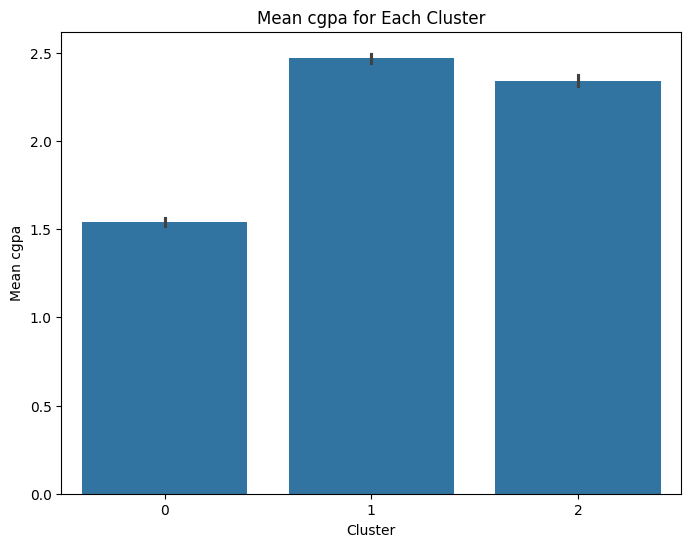

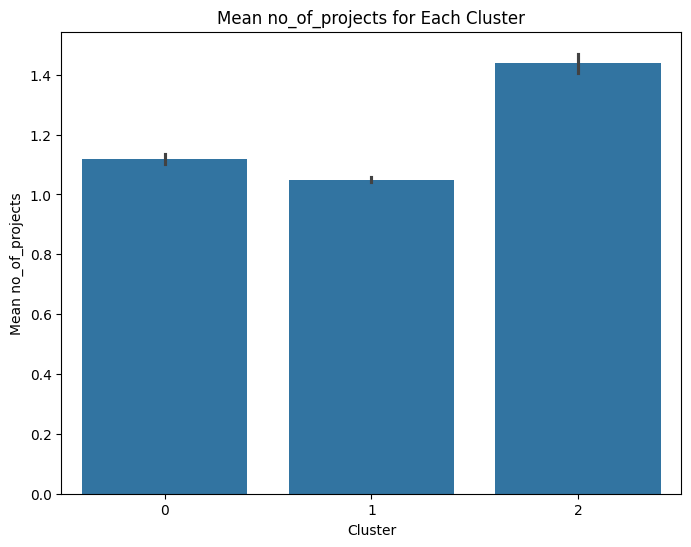

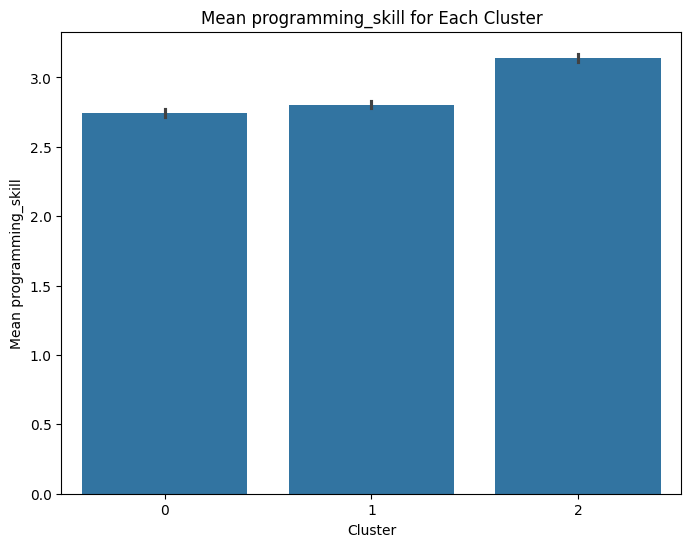

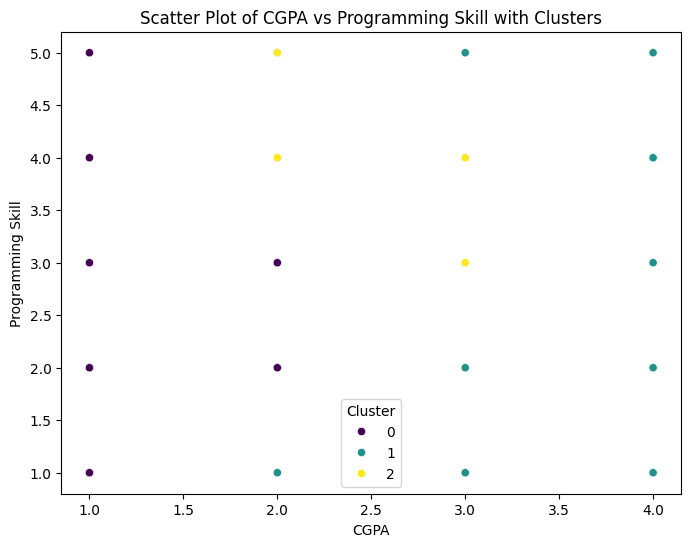

In [15]:

import matplotlib.pyplot as plt
import seaborn as sns


features_to_plot = ['cgpa', 'no_of_projects', 'programming_skill']

for feature in features_to_plot:
  plt.figure(figsize=(8, 6))
  sns.barplot(x='Cluster', y=feature, data=dataset, estimator=np.mean)
  plt.title(f'Mean {feature} for Each Cluster')
  plt.xlabel('Cluster')
  plt.ylabel(f'Mean {feature}')
  plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='cgpa', y='programming_skill', hue='Cluster', data=dataset, palette='viridis')
plt.title('Scatter Plot of CGPA vs Programming Skill with Clusters')
plt.xlabel('CGPA')
plt.ylabel('Programming Skill')
plt.show()
